In [1]:
import datetime as dt
import os, csv
import pandas as pd
import requests
from config import alpha_api

In [2]:
ticker = input('Ticker?')
monthly_ticker_json = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={ticker}&apikey={alpha_api}').json()

Ticker?gme


In [3]:
monthly_list = []
for key, value in monthly_ticker_json['Monthly Adjusted Time Series'].items():
    day_dict = {
        'open': float(value['1. open']), 'high': float(value['2. high']), 'low': float(value['3. low']),
        'close': float(value['4. close']), 'adjusted_close': float(value['5. adjusted close']), 'volume': float(value['6. volume']),
        'dividend_amount': float(value['7. dividend amount']), 'day' : dt.date.fromisoformat(key)
    }
    monthly_list.append(day_dict)    

In [4]:
monthly_ticker_df = pd.DataFrame(monthly_list)
monthly_ticker_df.head()

,adjusted_close,close,day,dividend_amount,high,low,open,volume
0,10.2900,10.29,2019-03-27,0.38,12.100,10.07,11.88,61166163.0
1,11.3076,11.70,2019-02-28,0.00,11.930,11.00,11.31,54707381.0
2,10.9597,11.34,2019-01-31,0.00,16.903,11.10,12.45,107232026.0
3,12.1967,12.62,2018-12-31,0.38,14.110,11.56,13.82,50160871.0
4,12.8332,13.66,2018-11-30,0.00,15.755,12.14,14.61,84573696.0


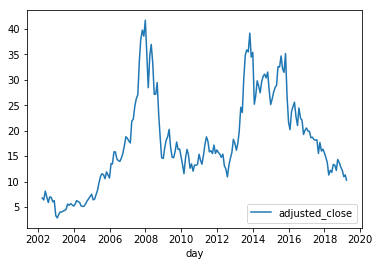

In [6]:
monthly_ticker_df.plot(x='day', y='adjusted_close')

In [37]:
test = requests.get('https://api.intrinio.com/data_point').json()

In [38]:
print(test)

{'errors': [{'human': 'Unauthorized to view this.', 'message': 'Did not provide valid http authentication.'}]}
